In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-powered-job-market-insights/ai_job_market_insights.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/ai-powered-job-market-insights/ai_job_market_insights.csv')

In [3]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Salary_USD,500.0,91222.390974,20504.291453,31969.526346,78511.514863,91998.195286,103971.282092,155209.821614


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary_USD', ylabel='Count'>

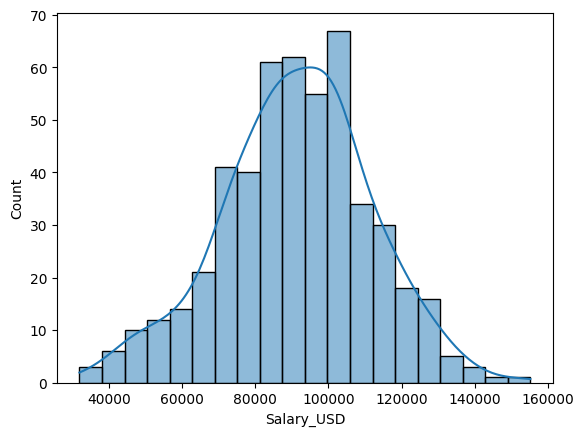

In [7]:
sns.histplot(df['Salary_USD'],kde=True)


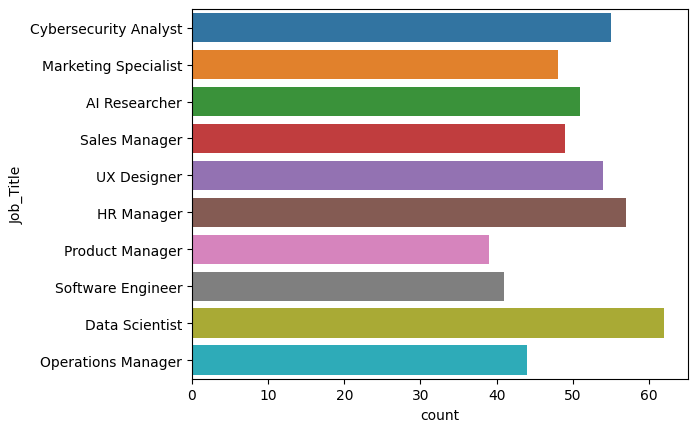

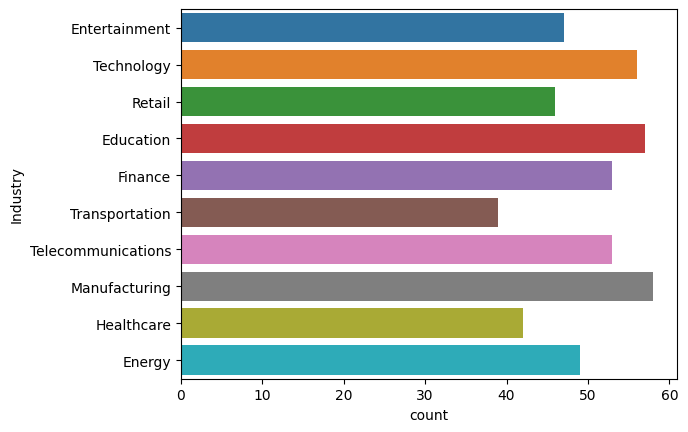

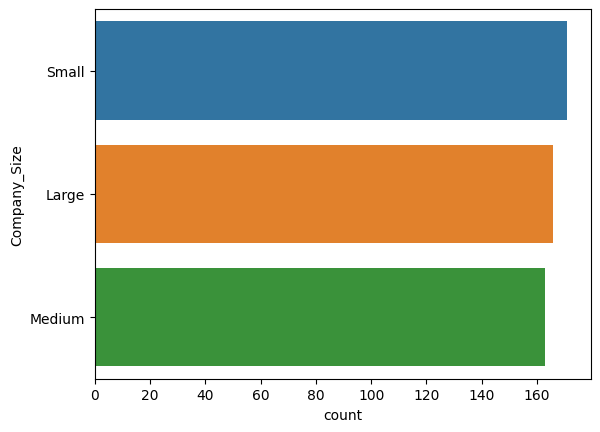

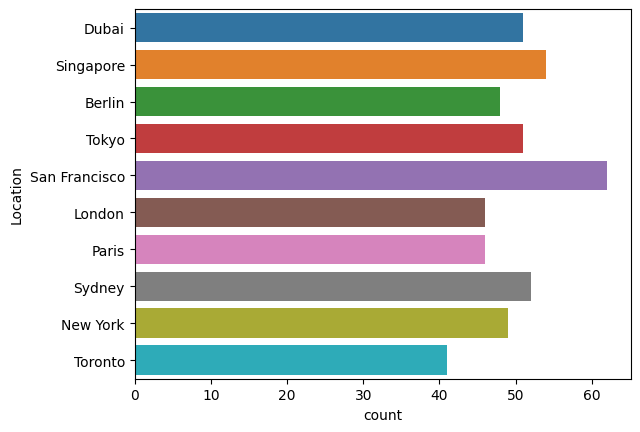

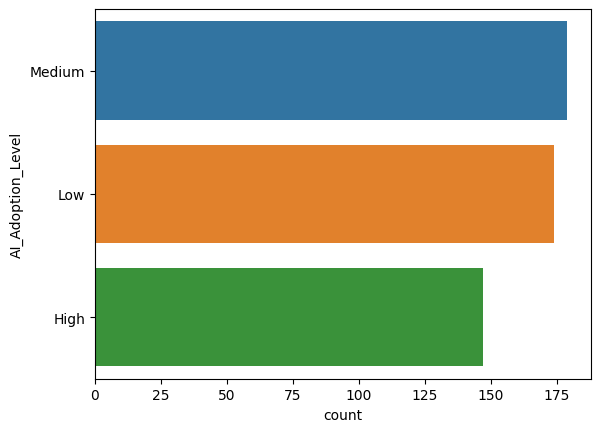

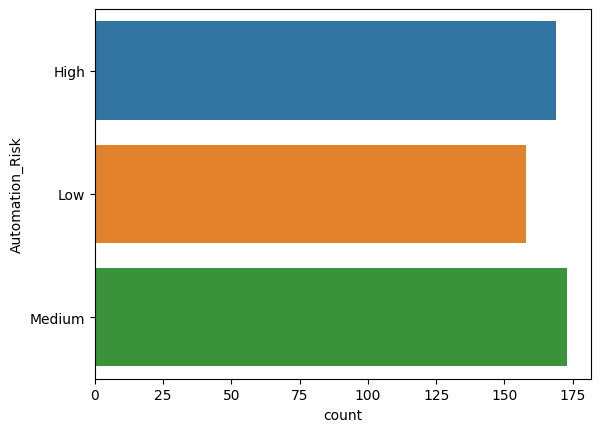

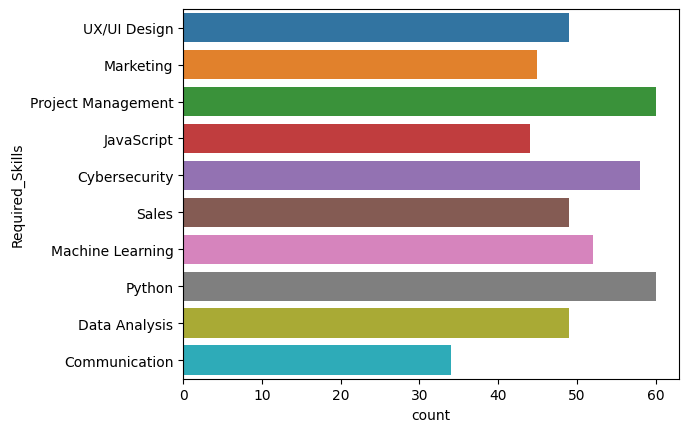

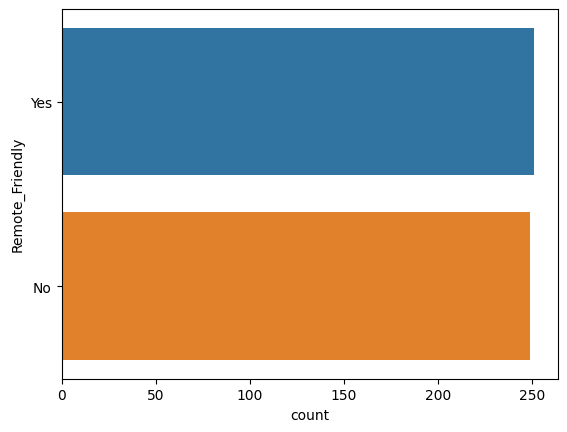

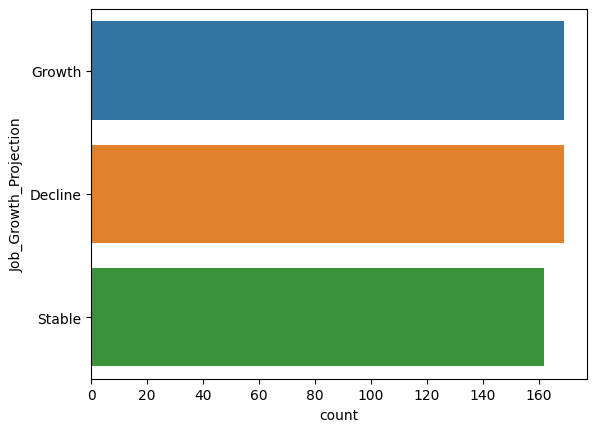

In [8]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(y=col,data=df)
        plt.show()

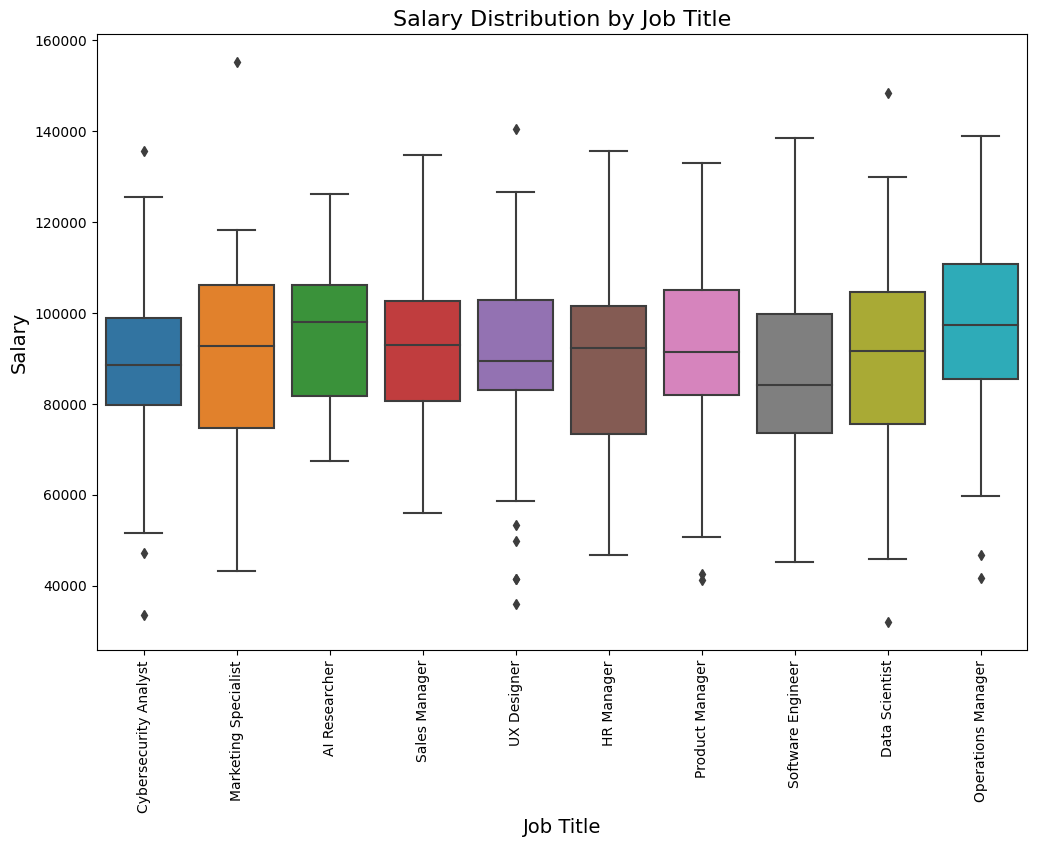

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Job_Title', y='Salary_USD', data=df)
plt.title('Salary Distribution by Job Title', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.xticks(rotation=90)
plt.show()

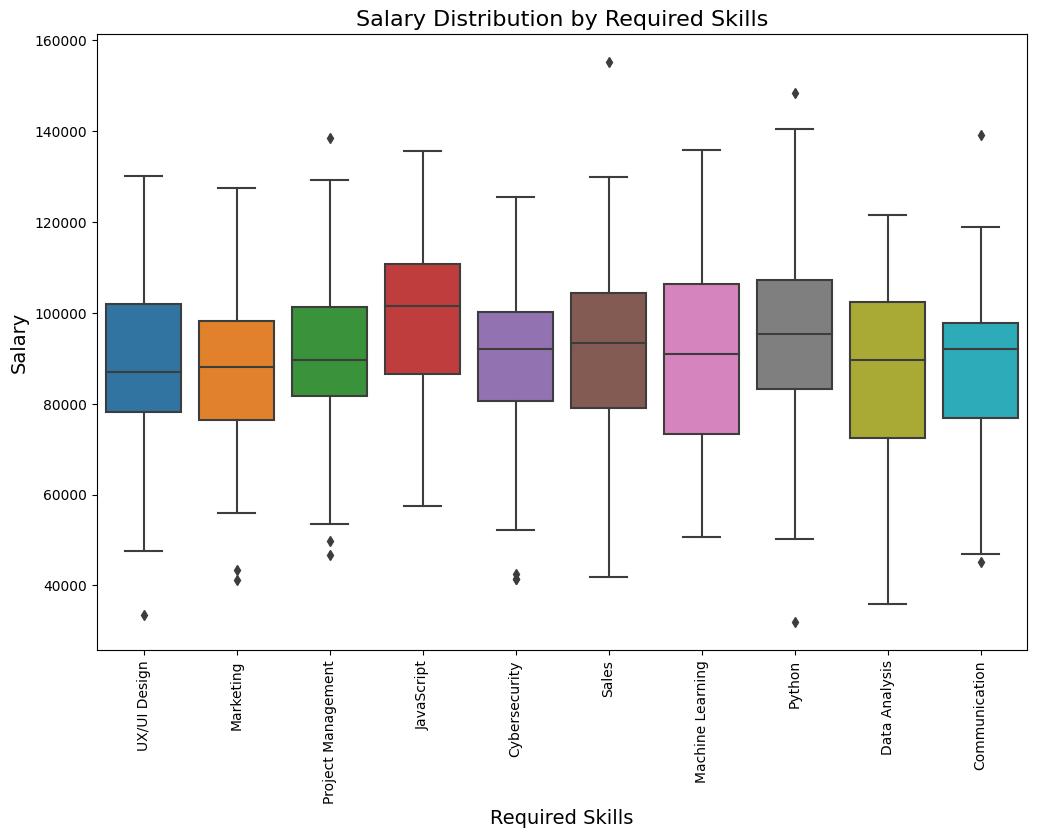

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Required_Skills', y='Salary_USD', data=df)
plt.title('Salary Distribution by Required Skills', fontsize=16)
plt.xlabel('Required Skills', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.xticks(rotation=90)
plt.show()

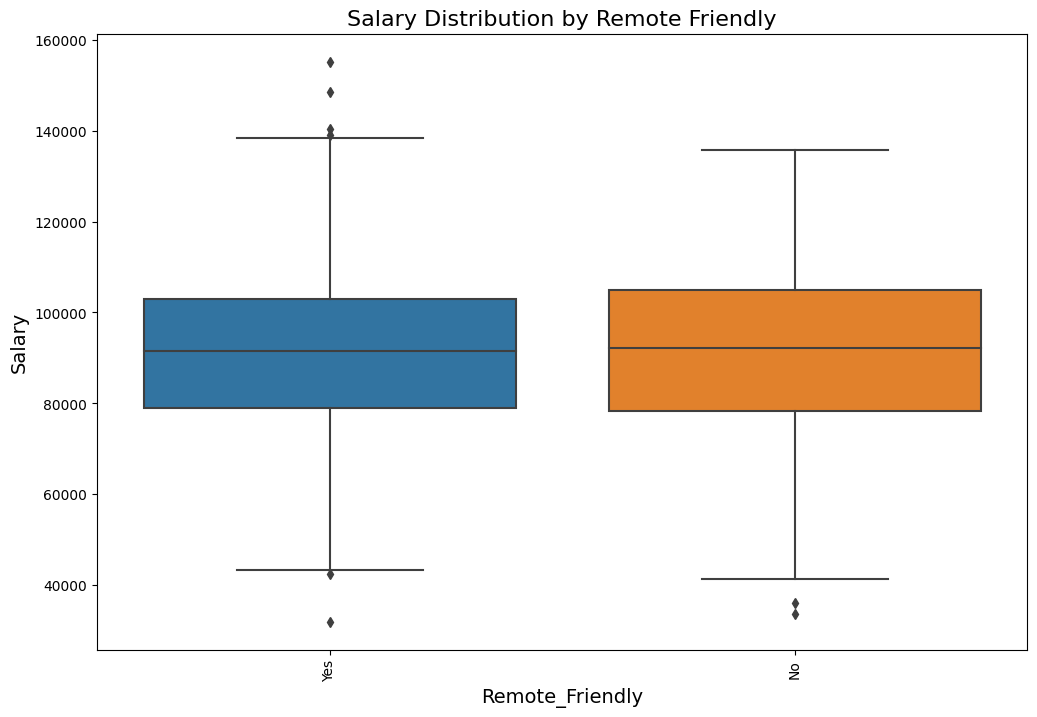

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Remote_Friendly', y='Salary_USD', data=df)
plt.title('Salary Distribution by Remote Friendly', fontsize=16)
plt.xlabel('Remote_Friendly', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])
        

<Axes: >

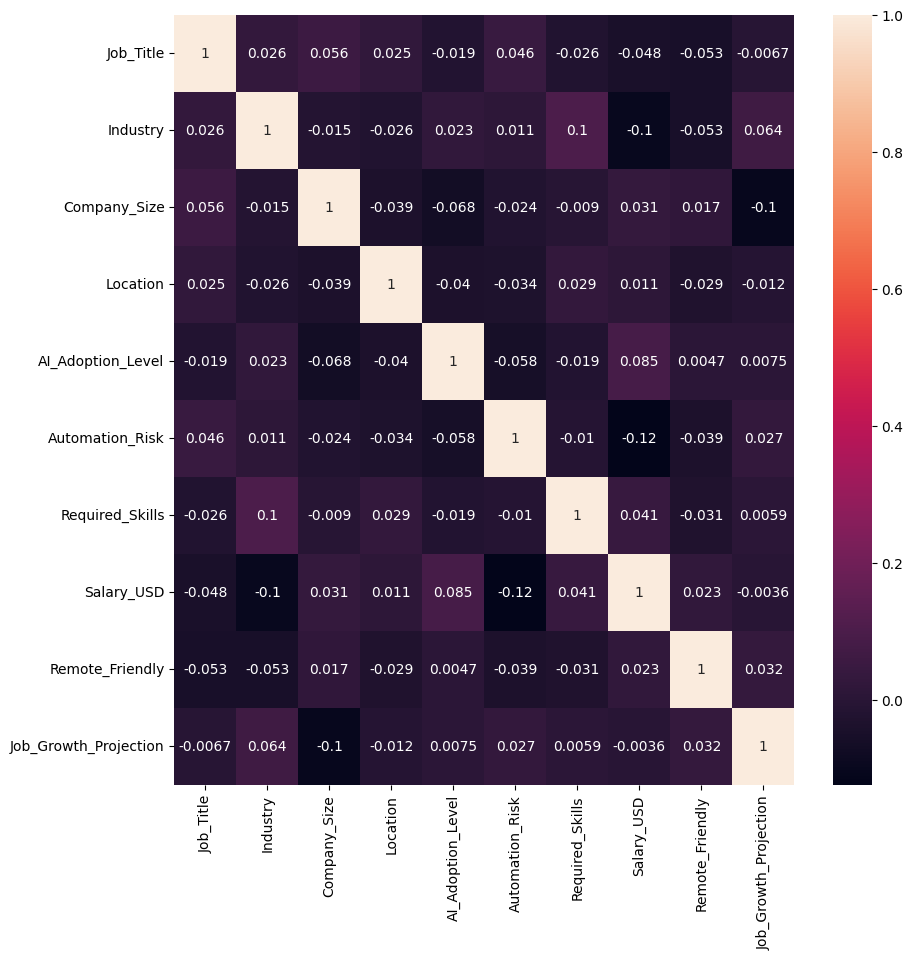

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)